In [1]:
import torch
import matplotlib.pyplot as plt
torch.cuda.is_available()

False

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)
y = x ** 2 + 2 * x + 1
print(y)
y.backward()
x.grad

tensor([2.], requires_grad=True)
tensor([9.], grad_fn=<AddBackward0>)


tensor([6.])

In [3]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)

tensor([1., 1., 1.])


In [6]:
#PERCEPTRON
#We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

#In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and
#$output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the
#linear transformation to the input $x$, and then apply the sigmoid activation function to the output.

import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x




perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)



# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

tensor([0.5257], grad_fn=<SigmoidBackward0>)
Epoch [100/1000], Loss: 0.4966
Epoch [200/1000], Loss: 0.4875
Epoch [300/1000], Loss: 0.4849
Epoch [400/1000], Loss: 0.4835
Epoch [500/1000], Loss: 0.4827
Epoch [600/1000], Loss: 0.4822
Epoch [700/1000], Loss: 0.4819
Epoch [800/1000], Loss: 0.4818
Epoch [900/1000], Loss: 0.4817
Epoch [1000/1000], Loss: 0.4816


In [6]:
#EX1

#Compute the gradient for the sigmoid activation function in 2 points using pytorch and 
#check it with the known explicit formula

x = torch.tensor([1.0, 2.0], requires_grad=True)

y = torch.sigmoid(x)
y.sum().backward()
grad_torch = x.grad
print(grad_torch) 

y = 1 / (1 + torch.exp(-x))
grad_formula = y * (1 - y)

print(grad_formula)

tensor([0.1966, 0.1050])
tensor([0.1966, 0.1050], grad_fn=<MulBackward0>)


In [7]:
#EX2

#Compute the gradient for the linear activation function in 2 points using pytorch and
#check it with the known explicit formula

x = torch.tensor([1.0, 2.0], requires_grad=True)

y = x
y.sum().backward()
grad_torch = x.grad
print(grad_torch) 

grad_formula = torch.ones_like(x)
print(grad_formula)

tensor([1., 1.])
tensor([1., 1.])


In [8]:
#EX3

#Compute the gradient for the relu activation function in 2 points using pytorch and check
#it with the known explicit formula.

x = torch.tensor([2.0, -1.5, 0], requires_grad=True)

y = torch.max(torch.zeros_like(x), x)
y.sum().backward()
grad_torch = x.grad
print(grad_torch)

grad_formula = torch.where(x > 0, 1.0, 0.0)
grad_formula[x == 0] = 0.5
print(grad_formula)


tensor([1.0000, 0.0000, 0.5000])
tensor([1.0000, 0.0000, 0.5000])


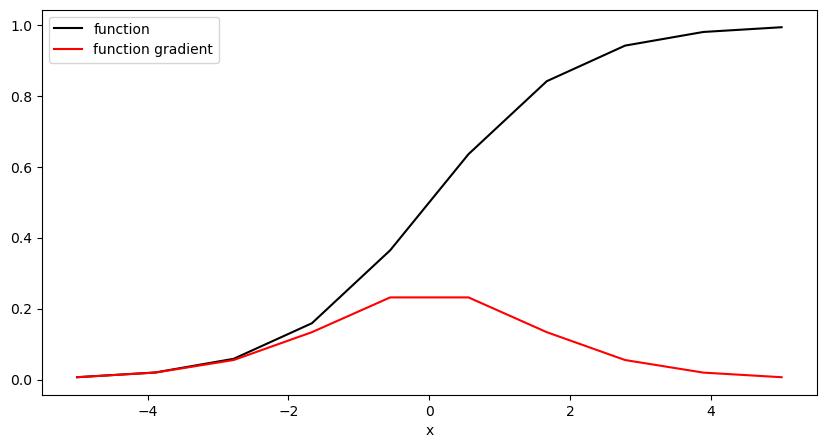

In [19]:
#EX4

#Write in python a function to plot the sigmoid activation function and its gradient using
#matplotlib

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def plot_sigmoid():
    x = np.linspace(-5, 5, 100)
    y = sigmoid(x)
    y_grad = sigmoid_grad(x)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'black', label='function')
    ax.plot(x, y_grad, 'red', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()

plot_sigmoid()



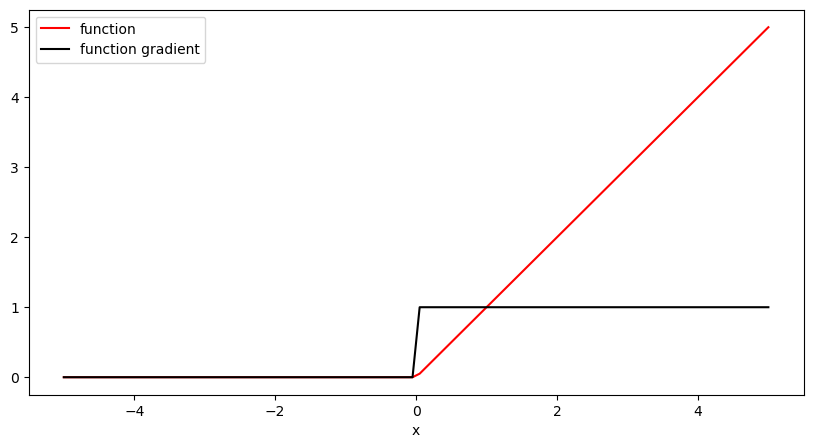

In [20]:
#EX5 
#Write in python a function to plot the ReLU activation function and its gradient using
#matplotlib.

import torch
import matplotlib.pyplot as plt

def relu(x):
    return torch.maximum(torch.tensor(0), x)

def relu_grad(x):
    return torch.where(x > 0, torch.tensor(1), torch.tensor(0))

def plot_relu():
    x = torch.linspace(-5, 5, 100)
    y = relu(x)
    y_grad = relu_grad(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'red', label='function')
    ax.plot(x, y_grad, 'black', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()

plot_relu()


In [ ]:
#EX 6

#Write in python a function to plot the tanh activation function and its gradient
#using matplotlib.

import torch
import matplotlib.pyplot as plt

def tanh(x):
    return torch.tanh(x)

def tanh_grad(x):
    return 1 - torch.square(torch.tanh(x))

def plot_tanh():
    x = torch.linspace(-10, 10, 100)
    y = tanh(x)
    y_grad = tanh_grad(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'black', label='function')
    ax.plot(x, y_grad, 'red', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()

plot_tanh()


In [ ]:
#EX 7

#Write in python a function to plot the leaky ReLU activation function and its gradient
#using matplotlib.

import torch
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.1):
    return torch.maximum(alpha * x, x)

def leaky_relu_grad(x, alpha=0.1):
    return torch.where(x > 0, 1, alpha)

def plot_leaky_relu():
    x = torch.linspace(-10, 10, 100)
    y = leaky_relu(x)
    y_grad = leaky_relu_grad(x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ax.plot(x, y, 'black', label='function')
    ax.plot(x, y_grad, 'red', label='function gradient')
    ax.set_xlabel('x')
    plt.legend()
    plt.show()

plot_leaky_relu()


In [9]:
#  NOT HW


import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x



perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)





criterion = nn.BCELoss() 
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer


input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()


num_epochs = 1000
for epoch in range(num_epochs):
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


tensor([0.3462], grad_fn=<SigmoidBackward0>)
Epoch [100/1000], Loss: 0.3216
Epoch [200/1000], Loss: 0.2389
Epoch [300/1000], Loss: 0.2023
Epoch [400/1000], Loss: 0.1792
Epoch [500/1000], Loss: 0.1622
Epoch [600/1000], Loss: 0.1488
Epoch [700/1000], Loss: 0.1377
Epoch [800/1000], Loss: 0.1284
Epoch [900/1000], Loss: 0.1203
Epoch [1000/1000], Loss: 0.1132


In [5]:
#EX 8

#Implement a binary classification model using the Perceptron class in PyTorch for the logic OR.

#Your task is to create a Perceptron instance and train it using a proper dataset and the binary
#cross-entropy loss with stochastic gradient descent optimizer.

#Here are the steps you can follow:

#Define a Perceptron class that inherits from torch.nn.Module and implements a binary
#classification model.

#Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

#Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

#Train the Perceptron model on the training set using the binary cross-entropy loss and
#stochastic gradient descent optimizer.

#Evaluate the trained model compute the accuracy.





import torch
import torch.nn as nn
import torch.optim as optim


class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


#dataset for OR
input_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Hyperparameters
input_size = 2
learning_rate = 0.1
num_epochs = 5000


perceptron = Perceptron(input_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(perceptron.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = perceptron(input_data)
    predicted = torch.round(predicted)
    correct = (predicted == labels).sum().item()
    accuracy = correct / labels.size(0) * 100.0

Epoch [100/5000], Loss: 0.3446
Epoch [200/5000], Loss: 0.2678
Epoch [300/5000], Loss: 0.2178
Epoch [400/5000], Loss: 0.1827
Epoch [500/5000], Loss: 0.1568
Epoch [600/5000], Loss: 0.1371
Epoch [700/5000], Loss: 0.1215
Epoch [800/5000], Loss: 0.1089
Epoch [900/5000], Loss: 0.0986
Epoch [1000/5000], Loss: 0.0900
Epoch [1100/5000], Loss: 0.0827
Epoch [1200/5000], Loss: 0.0764
Epoch [1300/5000], Loss: 0.0710
Epoch [1400/5000], Loss: 0.0663
Epoch [1500/5000], Loss: 0.0621
Epoch [1600/5000], Loss: 0.0585
Epoch [1700/5000], Loss: 0.0552
Epoch [1800/5000], Loss: 0.0522
Epoch [1900/5000], Loss: 0.0496
Epoch [2000/5000], Loss: 0.0472
Epoch [2100/5000], Loss: 0.0450
Epoch [2200/5000], Loss: 0.0430
Epoch [2300/5000], Loss: 0.0411
Epoch [2400/5000], Loss: 0.0394
Epoch [2500/5000], Loss: 0.0379
Epoch [2600/5000], Loss: 0.0364
Epoch [2700/5000], Loss: 0.0351
Epoch [2800/5000], Loss: 0.0338
Epoch [2900/5000], Loss: 0.0327
Epoch [3000/5000], Loss: 0.0316
Epoch [3100/5000], Loss: 0.0305
Epoch [3200/5000]